## 0. Computer vision libraries in pytorch
* `torchvision`
* `torchvision.datasets`- get dataset and data loading functions for computer vision
* `torchvision.models` - get pretrained computer vision models that we can leverage for our own problems
* `torchvision.transforms`- functions for mapupulating your vision data(images) to suitable for use with an ML model
* `torch.utils.data.Dataset`- base dataset class for pytorch
* `torch.utils.data.Dataloader`- create a python iterable over a dataset

In [1]:
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt

#check versions
print(torch.__version__)
print(torchvision.__version__)


2.5.1+cu121
0.20.1+cu121


## 1. Getting dataset


In [2]:
# setup training data
from torchvision import datasets

train_data=datasets.FashionMNIST(
    root= "data", #where to download data to?
    train=True, # do we want the training data?
    download=True,  # Do we want to download yes/no?
    transform= torchvision.transforms.ToTensor(), #how do we want to transform the data?
    target_transform= None  # how do we want to transform the labels/targets?
)

test_data= datasets.FashionMNIST(
    root= "data",
    train= False,
    download= True,
    transform= ToTensor(),
    target_transform= None
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 15.8MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 277kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.03MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 5.13MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first taining example
image, label= train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names= train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx= train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
# Check the shape of our image
print(f"Image shape:{image.shape} ->[color_channels, height, width]")
print(f"Image label: {label}")

Image shape:torch.Size([1, 28, 28]) ->[color_channels, height, width]
Image label: 9


## 1.2 Visualizing our data

Image shape:torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

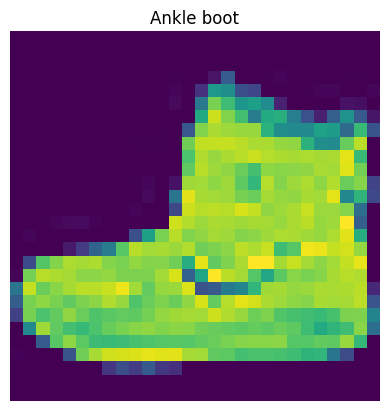

In [9]:
import matplotlib.pyplot as plt

image, label= train_data[0]
print(f"Image shape:{image.shape}")
plt.imshow(image.squeeze())
plt.title(class_names[label])
plt.axis(False)


(-0.5, 27.5, 27.5, -0.5)

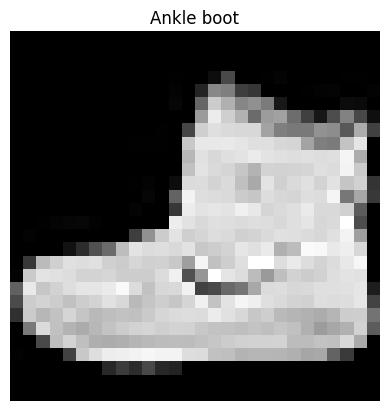

In [10]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

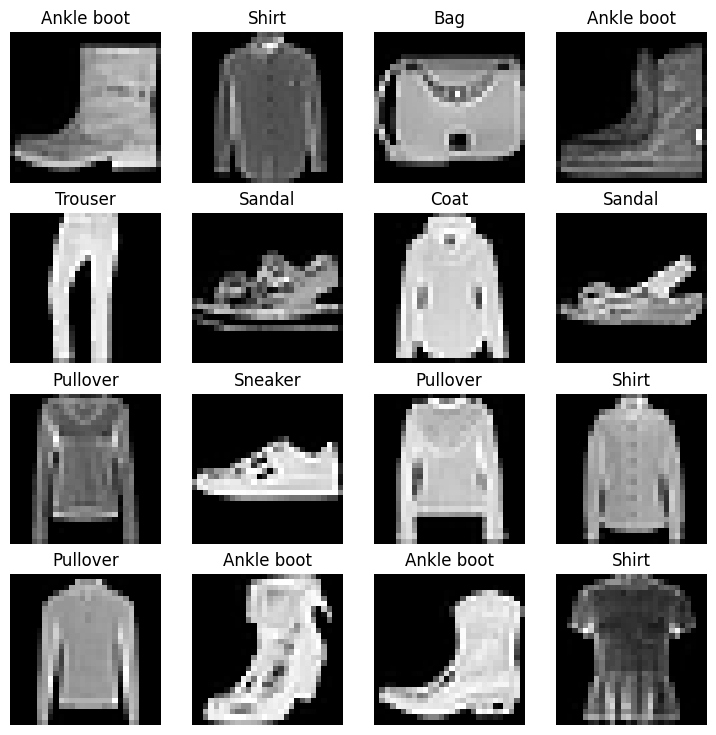

In [11]:
# plot more images
torch.manual_seed(42)
fig= plt.figure(figsize=(9,9))
rows, cols= 4,4
for i in range(1, rows*cols+1):
  random_idx= torch.randint(0, len(train_data), size=[1]).item()
  img, label= train_data[random_idx]
  fig.add_subplot(rows,cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)



In [12]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare Dataloader

Right now, our data is in the form of pytorch Datasets.

DataLoader turns our data into pytorch iterable

More specifically, we want to turn our training data into batches.

Why whould we do this?

1. It is more computationally efficient, as in our computing hardware may not be able to look(store in a memory) at 60000 images in one hit. So we break it down to 32 images at a time( batch size of 32
2. It gives our neural network more chances to update its gradient per epoch.
                                                                                                                                                                                         
                                                                                                                                                                                         
                                                                                                                                                                                         )

In [13]:
# turn train dataset into dataloader
from torch.utils.data import DataLoader
BATCH_SIZE=32

train_dataloader= DataLoader(dataset= train_data, batch_size=BATCH_SIZE, shuffle= True)
test_dataloader= DataLoader(dataset= test_data, batch_size=BATCH_SIZE, shuffle= False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7967ada5c250>,
 <torch.utils.data.dataloader.DataLoader at 0x7967ada78d00>)

In [14]:
# Lets check out what we have created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7967ada5c250>, <torch.utils.data.dataloader.DataLoader object at 0x7967ada78d00>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [15]:
# Check out what inside training dataloader
train_features_batch, train_labels_batch= next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image shape: torch.Size([1, 28, 28])
Label: 6


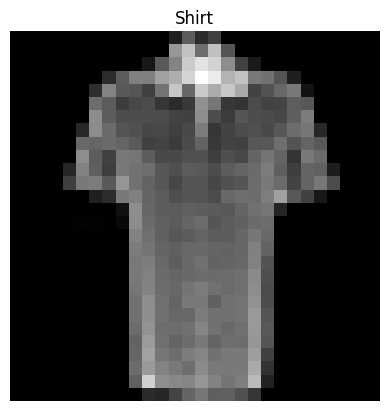

In [16]:

# Show a sample
torch.manual_seed(42)
random_idx= torch.randint(0, len(train_features_batch), size=[1]).item()
img, label= train_features_batch[random_idx], train_labels_batch[random_idx]
print(f"Image shape: {img.shape}")
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Label: {label}")


## 3. Model 0: Building a model

When starting to build a serires of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model we will try and improve upon with subsequent models

In other words : start simply and complexity when necessary


In [17]:
# Create a flatten layer
flatten_model= nn.Flatten()

# Get a single sample
x= train_features_batch[0]

# Flatten the sample
output= flatten_model(x)  #perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height,width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")


Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height,width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [18]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int,
               hidden_units: int,
              output_shape: int):
    super().__init__()
    self.layer_stack= nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features= hidden_units),
        nn.Linear(in_features=hidden_units, out_features= output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)


In [19]:
torch.manual_seed(42)

# Setup model with input parameters
model_0= FashionMNISTModelV0(input_shape=28*28,
                             hidden_units=10,  #units in hidden layers
                             output_shape= len(class_names)  #one for every class
                             ).to("cpu")
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x= torch.rand([1,1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [21]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss optimizer and evaluation metrics

* Loss function- since we're working with multiclass data out loss function will be `nn.CrossEntropyLoss()`
* Optimizer- our optimizer `torch.optim.SGD`
* Evaluation metrics- accuracy

In [22]:
import requests
from pathlib import Path

# Download helper function from learn pytorch repo

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
    print("Downloading helper_functions.py")
    request= requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
      f.write(request.content)

In [23]:
from helper_functions import accuracy_fn

# setup loss function and optimizer
loss_fn= nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params= model_0.parameters(),
                           lr= 0.1)

### 3.2 Creating a function to time our experience

Machine learning is very experimental.

Two of the main things we'll often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs

In [24]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device= None):
  '''print the differnce between start and end time'''
  total_time= end-start
  print(f"Time to train on device: {device} : {total_time:.3f} seconds")
  return total_time

In [25]:
start_time= timer()
# some code here....
end_time= timer()
print_train_time(start= start_time,end= end_time, device= "cpu" )


Time to train on device: cpu : 0.000 seconds


5.5143000011526055e-05

### 3.3 Creatinf a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss per batch.
4. printout whats happening
5. Time it all

In [26]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu= timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs= 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  ### Training
  train_loss=0

  # Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()

    # 1. Forward pass
    y_pred= model_0(X)

    # 2. Calculate the loss(per batch)
    loss= loss_fn(y_pred, y)
    train_loss+= loss # Accumulate train loss

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 4. optimizer step
    optimizer.step()

    #Print how many sample  has been seen
    if batch % 400==0:
      print(f"Looked at {batch * len(X)}/ {len(train_dataloader.dataset)} samples")

  # Divide total train loss by length of train dataloader
  train_loss/= len(train_dataloader)

  ### Testing
  test_loss, test_acc= 0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      # 1. Forward pass
      test_pred= model_0(X_test)

      # 2. Calculate loss
      test_loss+= loss_fn(test_pred, y_test)

      # 3. Calculate accuracy
      test_acc+= accuracy_fn(y_test, test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss/= len(test_dataloader)

    #Calculate the test acc average per batch
    test_acc/= len(test_dataloader)

  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}")

# calculate the training time
train_time_end_on_cpu= timer()
total_train_time_model_0= print_train_time(start= train_time_start_on_cpu,
                                            end= train_time_end_on_cpu,
                                            device= "cpu")






  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04
Epoch: 1
--------
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20
Epoch: 2
--------
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43
Time to train on device: cpu : 35.514 seconds


## 4. Make predictions and get model_0 results

In [27]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  ''' Return a dictionary containing the result of model predicting on data_loader
   Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
  '''
  loss, acc= 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      # Make prediction
      y_pred= model(X)

      # Accumulate the loss and acd values per batch
      loss+= loss_fn(y_pred, y)
      acc+= accuracy_fn(y_true=y,
                       y_pred= y_pred.argmax(dim=1))
      # Scale loss and acc to find the average loss/acc per batch
    loss/= len(data_loader)
    acc/= len(data_loader)

  return {"model_name":model.__class__.__name__,  # ONLY Works when model was created with a class
          "model_loss":loss.item(),
          "model_acc":acc}

# Calculate model_0 results on test dataset
model_0_results= eval_model(model= model_0,
                            data_loader= test_dataloader,
                            loss_fn= loss_fn,
                            accuracy_fn= accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [28]:
# setup device agnostic code
import torch
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 6. Model 1: Building a better model with non linearity

We learned about the non linearity in previous neural network file_requires_unicode

In [29]:
# Create a model with linear and non linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack= nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [30]:
# Create a instance of model_1
torch.manual_seed(42)
model_1= FashionMNISTModelV1(input_shape= 28*28,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cpu')

In [31]:
from helper_functions import accuracy_fn

loss_fn= nn.CrossEntropyLoss()  #measure how wrong our model is
optimizer= torch.optim.SGD(params= model_1.parameters(),
                           lr= 0.1) # tries to update our models parameters to reduce loss


### 6.2 Functionizing training and evaluation/ testing loop

Lets create a function for :
* training loop= `train_step()`
* testing loop= `test_step()`

In [32]:
def train_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    accuracy_fn,
    device: torch.device= device):

  ''' Perform a training with model trying to learn on dataloader.'''
  train_loss, train_acc= 0,0
  model.train()

  #add a loop to loop through the training batches
  for batch, (X,y) in enumerate(data_loader):
    # Put the data on target device
    X,y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred= model(X)

    # 2. Calculate the loss (per batch)
    loss= loss_fn(y_pred,y)
    train_loss+= loss.item() #accumulate the losses
    train_acc+= accuracy_fn(y_true=y,
                            y_pred= y_pred.argmax(dim=1)) # go from logits -> prediction table


    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. optimizer steps
    optimizer.step()

    #print whats happening
    # if batch %400==0:
    #   print(f"Looked at {batch*len(X)}/{len(data_loader.dataset)} samples")

  # Divide total train loss and accuracy by length of train dataloader
  train_loss= train_loss/ len(data_loader)
  train_acc= train_acc/ len(data_loader)
  print(f"Train loss: {train_loss:.5f} | train acc: {train_acc: 2f}")



In [33]:
def test_step(model: torch.nn.Module,
             data_loader: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module,
             accuracy_fn,
             device: torch.device= device):
  ''' Perform the model in eval mode'''
  test_loss,test_acc= 0,0
  model.eval()

  # Turn on inference mode
  with torch.inference_mode():
    for X, y in data_loader:
      # Send data to target device
      X,y= X.to(device), y.to(device)

      # 1. Forward pass
      test_pred= model(X)

      # 2. Calculate the loss/acc
      test_loss+=loss_fn(test_pred, y)
      test_acc+= accuracy_fn(y_true= y,
                             y_pred= test_pred.argmax(dim=1)) #go from logits to prediction labels

    # Adjust metrics and print out
    test_loss/= len(data_loader)
    test_acc/= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f} % \n")



In [34]:
torch.manual_seed(42)

#Measure time
from timeit import default_timer as timer

train_time_start_on_gpu= timer()

# Set epochs
epochs=3

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(model= model_1,
             data_loader= train_dataloader,
             loss_fn= loss_fn,
             optimizer= optimizer,
             accuracy_fn= accuracy_fn,
             device= device)
  test_step(model= model_1,
            data_loader= test_dataloader,
            loss_fn= loss_fn,
            accuracy_fn= accuracy_fn,
            device= device)
  print("\n")

  train_time_end_on_gpu= timer()
  total_train_time_model_1= print_train_time(start= train_time_start_on_gpu,
                                             end= train_time_end_on_gpu,
                                             device= device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | train acc:  61.343333
Test loss: 0.95636 | Test acc: 65.00 % 



Time to train on device: cpu : 15.150 seconds
Epoch: 1
---------
Train loss: 0.78101 | train acc:  71.928333
Test loss: 0.72227 | Test acc: 73.91 % 



Time to train on device: cpu : 30.924 seconds
Epoch: 2
---------
Train loss: 0.67027 | train acc:  75.936667
Test loss: 0.68500 | Test acc: 75.02 % 



Time to train on device: cpu : 42.541 seconds


In [35]:
model_1_results= eval_model(model= model_1,
                            data_loader=test_dataloader,
                            loss_fn= loss_fn,
                            accuracy_fn= accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [36]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [37]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [38]:
total_train_time_model_0

35.51445476900001

## Model 2 : Building a CNN

CNN's are also known as ConvNets

CNN's are also known for their capabilities to find patterns in images

In [39]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  '''
  Model architure replicates the TinyVGG model from "CNN explainer" website
  '''
  def __init__(self,
               input_shape=int,
               hidden_units=int,
               output_shape=int,
               ):
    super().__init__()
    self.conv_block_1= nn.Sequential(
        # Create a conv layer
        nn.Conv2d(in_channels=input_shape,
                  out_channels= hidden_units,
                  kernel_size= 3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels= hidden_units,
                  kernel_size= 3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
        )
    self.conv_block_2= nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels= hidden_units,
                  kernel_size= 3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels= hidden_units,
                  kernel_size= 3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier= nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,  #there is a trick to calculate this
                  out_features=output_shape),
    )

  def forward(self,x):
    x= self.conv_block_1(x)
    # print(f"Output shape of conv_block_1:{x.shape}")
    x= self.conv_block_2(x)
    # print(f"Output shape of conv_block_2:{x.shape}")
    x= self.classifier(x)
    # print(f"Output shape of classifier:{x.shape}")
    # print(x.shape)
    return x


In [40]:
image.shape

torch.Size([1, 28, 28])

In [41]:
torch.manual_seed(42)
model_2= FashionMNISTModelV2(input_shape=1,
                             hidden_units=10,
                             output_shape= len(class_names)).to(device)

model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [42]:
rand_image_tensor= torch.rand(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

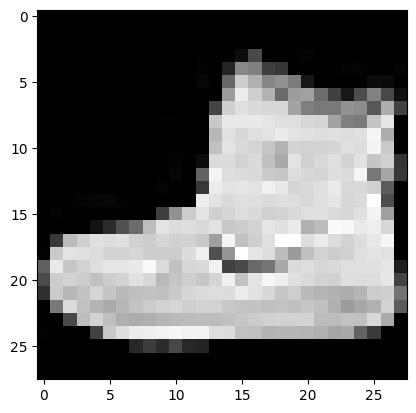

In [43]:
plt.imshow(image.squeeze(), cmap= "gray")

In [44]:
model_2(image.unsqueeze(dim=0).to(device))

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], grad_fn=<AddmmBackward0>)

### 7.3 Setup loss function and optimizer for model_2

In [45]:
#set up loss function and optimizer
from helper_functions import accuracy_fn

loss_fn= nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params= model_2.parameters(),
                           lr=0.1)

### 7.4 Training and testing model_2 using our training and test functions


In [46]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2= timer()

# Train and test model
epochs= 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n---------")
  train_step(model=model_2,
             data_loader= train_dataloader,
             loss_fn= loss_fn,
             optimizer= optimizer,
             accuracy_fn= accuracy_fn,
             device= device)
  test_step(model= model_2,
            data_loader= test_dataloader,
            loss_fn= loss_fn,
            accuracy_fn= accuracy_fn,
            device= device
            )

train_time_end_model_2= timer()
total_train_time_model_2= print_train_time(start= train_time_start_model_2,
                                           end= train_time_end_model_2,
                                           device= device
                                           )

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
---------
Train loss: 0.59518 | train acc:  78.375000
Test loss: 0.39500 | Test acc: 85.99 % 

Epoch: 1 
---------
Train loss: 0.36536 | train acc:  86.901667
Test loss: 0.35244 | Test acc: 86.91 % 

Epoch: 2 
---------
Train loss: 0.32588 | train acc:  88.128333
Test loss: 0.32719 | Test acc: 88.07 % 

Time to train on device: cpu : 174.945 seconds


In [47]:
# Get model_2 results
model_2_results= eval_model(model= model_2,
                            data_loader= test_dataloader,
                            loss_fn= loss_fn,
                            accuracy_fn= accuracy_fn
                            )
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

## 8. Compare the results and training time


In [48]:
import pandas as pd
compare_results= pd.DataFrame([model_0_results,
                              model_1_results,
                              model_2_results]
                              )
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.327190,88.069089


In [49]:
# Add training time to results comparism
compare_results['training_time']= [f"{total_train_time_model_0:.3f}",
                                  f"{total_train_time_model_1:.3f}",
                                  f"{total_train_time_model_2:.3f}"]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,35.514
1,FashionMNISTModelV1,0.685001,75.019968,42.541
2,FashionMNISTModelV2,0.327190,88.069089,174.945


Text(0, 0.5, 'Model')

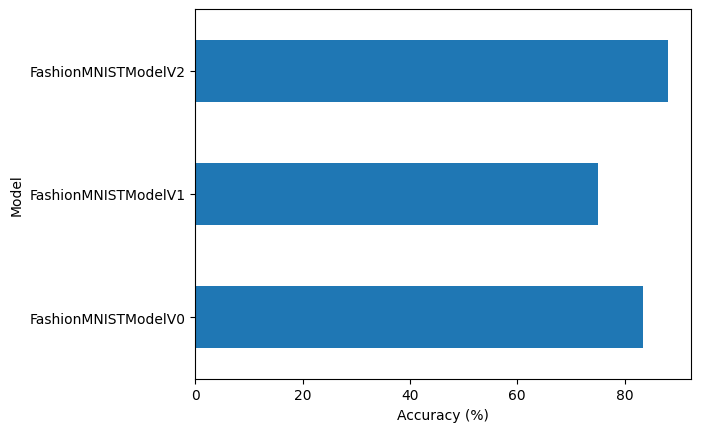

In [50]:
# Visualize our model results
import matplotlib.pyplot as plt
compare_results.set_index("model_name")['model_acc'].plot(kind='barh')
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")


## 9. Make and evaluate random prediction with best model


In [51]:
def make_predictions( model: torch.nn.Module,
                     data: list,
                     device: torch.device= device):
  pred_probs= []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #Prepare the sample (add a batch dimension and pass to target device)
      sample= torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model output raw logits)
      pred_logit= model(sample)

      # Get prediction probability(logit-> prediction probability)
      pred_prob= torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off GPU for further calcuulation
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_prob
  return torch.stack(pred_probs)


In [52]:
import random
# random.seed(42)
test_samples= []
test_labels= []
for sample, label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape



torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Dress')

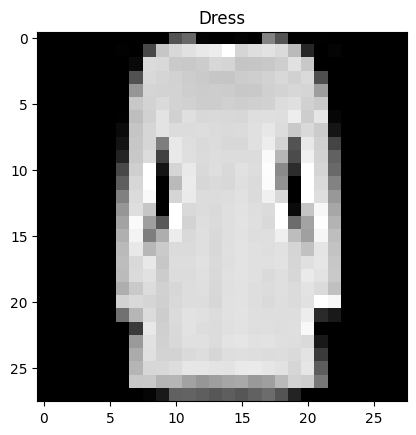

In [53]:
plt.imshow(test_samples[0].squeeze(), cmap= "gray")
plt.title(class_names[test_labels[0]])

In [54]:
# Make predictions
pred_probs= make_predictions(model= model_2,
                             data= test_samples)

#View first 2 predictions probabilities
pred_probs[:2]


tensor([[1.7033e-02, 6.5289e-04, 1.2865e-02, 9.2459e-01, 1.0656e-02, 1.3206e-04,
         3.3865e-02, 2.8393e-05, 1.7067e-04, 9.9211e-06],
        [9.2412e-01, 2.2108e-05, 6.1982e-04, 1.0974e-02, 9.6365e-05, 8.9634e-07,
         6.4119e-02, 7.1315e-07, 4.9899e-05, 1.8777e-07]])

In [55]:
#Convert prediction probabilities to labels
pred_classes= pred_probs.argmax(dim=1)
pred_classes

tensor([3, 0, 8, 4, 6, 0, 5, 6, 6])

In [56]:
test_labels

[3, 0, 8, 4, 6, 0, 5, 6, 3]

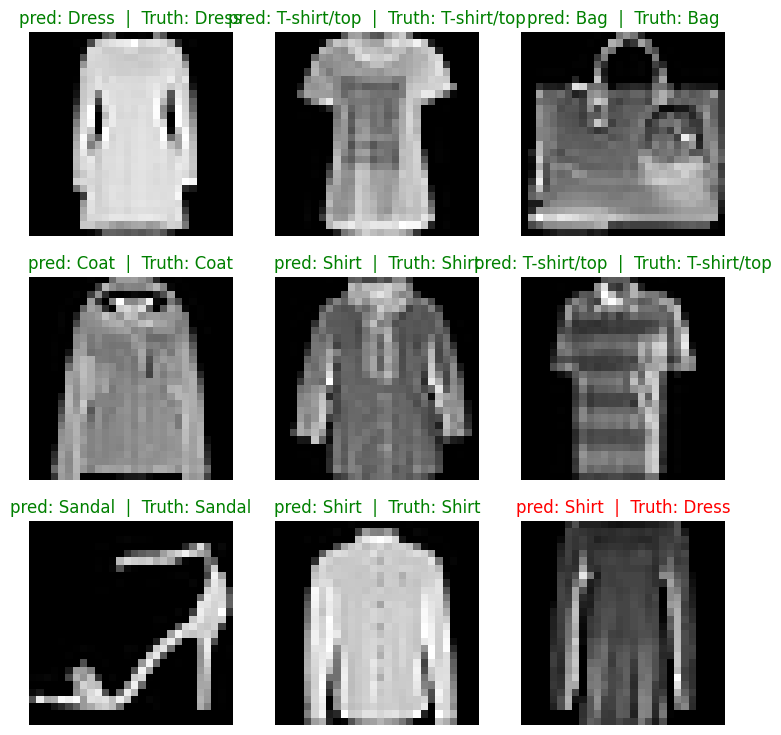

In [57]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows= 3
ncols= 3
for i, sample in enumerate(test_samples):
  #create subplot
  plt.subplot(nrows, ncols, i+1)

  #plot the target image
  plt.imshow(sample.squeeze(), cmap= "gray")

  # Find the prediction (in text form, eg Sandal)
  pred_label= class_names[pred_classes[i]]

  # Get the truth label(in text format)
  truth_label= class_names[test_labels[i]]

  # Create a title for the plot
  title_text= f"pred: {pred_label}  |  Truth: {truth_label}"

  # Check for equaliy between pred and truth and change color of title text
  if pred_label== truth_label:
    plt.title(title_text, color= "green")
  else:
    plt.title(title_text, color= "red")

  plt.axis(False)


## 10. Making confusiton matrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluating your classification models visually
1. Make prediction with our trained model on the test dataset
2. Make a confusion matrix using mlxtend library
3. Plot the confusion matrix


In [60]:
# Imprt tqdm.auto
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds=[]
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader):
    # Forward pass
    y_logit= model_2(X)
    # turn predictions from logits -> predictions probabilities -> prediction labels
    y_pred= torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concarenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor= torch.cat(y_preds)
y_pred_tensor[:10]



  0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [61]:
len(y_pred_tensor)

10000

In [62]:
# See if required packages are installed and if not intall them
try:
  import torchmetrics, mlxtend
  from mlxtend.plotting import plot_confusion_matrix
  print(f"mlxtend version: {mlxtend.__version__}")

except:
  !pip install torchmetrics -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 14.7 MB/s eta 0:00:00
mlxtend version: 0.23.3


In [69]:
import mlxtend
test_data.targets, y_pred_tensor


(tensor([9, 2, 1,  ..., 8, 1, 5]), tensor([9, 2, 1,  ..., 8, 1, 8]))

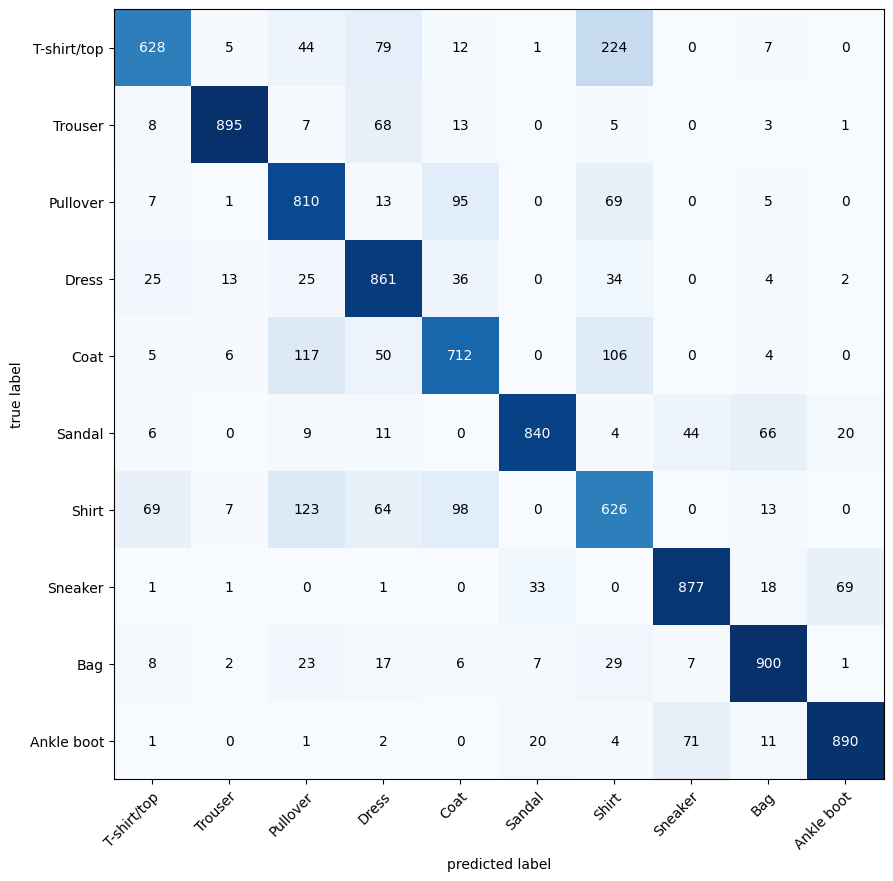

In [70]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to target
confmat= ConfusionMatrix(task= "multiclass", num_classes= len(class_names))
confmat_tensor= confmat(preds= y_pred_tensor, target=test_data.targets)

# 3. plot the confusion matrix
fig, ax= plot_confusion_matrix(
    conf_mat= confmat_tensor.numpy(),   #matploylib likes working with numpy
    class_names= class_names,
    figsize=(10,10)
)

## 11. Save and load the best model


In [72]:
from pathlib import Path

# Create model directory path
MODEL_PATH= Path('models')
MODEL_PATH.mkdir(parents= True, exist_ok= True)

# Create model save
MODEL_NAME= "03_pytorch_challenge_model_2.pth"
MODEL_SAVE_PATH= MODEL_PATH/ MODEL_NAME

# Save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj= model_2.state_dict(),
           f= MODEL_SAVE_PATH)





Saving model to : models/03_pytorch_challenge_model_2.pth


In [73]:
# Create a new instance of model
torch.manual_seed(42)

loaded_model_2= FashionMNISTModelV2(input_shape=1,
                                    hidden_units=10,
                                    output_shape= len(class_names)
                                    )

# Load in save state_dict()
loaded_model_2.load_state_dict(torch.load(f= MODEL_SAVE_PATH))

# Send the model to target device
loaded_model_2.to(device)



<ipython-input-73-f5728a2779c9>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f= MODEL_SAVE_PATH))


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [74]:
# Evaluate the loaded model
torch.manual_seed(42)

loaded_model_2_results= eval_model(model= loaded_model_2,
                                   data_loader= test_dataloader,
                                   loss_fn=loss_fn,
                                   accuracy_fn= accuracy_fn
                                   )
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [75]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [77]:
# CHeck if model results are close to each other
torch.isclose(torch.tensor(model_2_results['model_acc']), torch.tensor(loaded_model_2_results['model_acc']))

tensor(True)